# Tratamento de Dados 2

## Percentual de negros em relação ao número total de mortes em acidente de transporte nos municípios brasileiros. Seguindo critério adotado pelo IBGE foram consideradas negras, a soma das pessoas pretas e pardas.
Arquivo: [proporcao_mortes_negras_acidente_transporte](https://basedosdados.org/dataset/br-mobilidados-indicadores?bdm_table=proporcao_mortes_negras_acidente_transporte)

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [46]:
dataset = pd.read_csv("../datasets/proporcao_mortes_negras_acidente_transporte.csv")

In [47]:
dataset.head()

,ano,sigla_uf,id_municipio,indicador,prop_mortes_negras_acidente_transporte
0,2000,RO,1100015,Total,50.000000
1,2000,RO,1100023,Total,42.857143
2,2000,RO,1100031,Total,0.000000
3,2000,RO,1100049,Total,73.333333
4,2000,RO,1100056,Total,50.000000


In [48]:
# Linhas com id_municipio vazio
dataset[dataset["id_municipio"] == " "]

,ano,sigla_uf,id_municipio,indicador,prop_mortes_negras_acidente_transporte
258,2000,PA,,Total,100.000000
976,2000,CE,,Total,83.333333
1086,2000,RN,,Total,0.000000
1165,2000,RN,,Total,100.000000
1396,2000,PB,,Total,0.000000
...,...,...,...,...,...
667773,2019,RS,,Outros,0.000000
667914,2019,RS,,Outros,0.000000
667927,2019,RS,,Outros,0.000000
668105,2019,MT,,Outros,0.000000


#### Observação
O dataset possui 3.240 linhas com o campo *id_municipio* vazio, então achei que seria melhor excluirmos essas linhas a fim de manter os dados mais consistentes.

In [49]:
dataset = dataset[dataset["id_municipio"] != " "]

#### Observação
O dataset atual trata da morte de ciclistas, motoristas, pedestres, etc. Meu objetivo, com esse conjunto de dados, é tentar descobrir se há correlação entre as mortes no transporte e o investimento em infraestrutura de transporte.

### Informações sobre a Tabela

In [50]:
indicadores = dataset["indicador"].unique()
indicadores

array(['Total', 'Pedestres', 'Ciclistas', 'Motociclistas',
       'Ocupantes de automóvel', 'Outros'], dtype=object)

In [51]:
estados = dataset["sigla_uf"].unique()
estados

array(['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN',
       'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC',
       'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

In [52]:
# HashMap de estados por região
regioes = {"Norte": {"PA", "RR", "AP", "AM", "TO", "RO", "AC", "MA"},
           "Nordeste": {"SE", "CE", "PB", "AL", "RN", "PE", "BA", "PI"},
           "Sudeste": {"MG", "RJ", "SP", "ES"},
           "Centro-Oeste": {"DF", "MS", "MT", "GO"},
           "Sul": {"PR", "SC", "RS"}}

In [53]:
periodo = range(2000, 2020)

### Analisando a média da porcentagem de mortes totais por região

In [54]:
def get_media_prop_by_regiao(regiao, indicador, ano):
    """
    :param regiao: região a ser selecionada
    :param indicador: indicador a ser selecionado
    :param ano: ano a ser selecionado
    :return: média do percentual de pessoas próximas a redes de transporte
    """
    media = dataset[(dataset["ano"] == ano) & (dataset["indicador"] == indicador) &
                    (dataset["sigla_uf"].isin(regioes[regiao]))]["prop_mortes_negras_acidente_transporte"].mean()
    return media

In [55]:
medias_regiao = [get_media_prop_by_regiao(regiao, "Total", ano) 
                 for ano in periodo
                 for regiao in regioes]

df1 = pd.DataFrame(np.array(medias_regiao).reshape(20, 5),
                   index=periodo, columns=regioes)
df1.index.name, df1.columns.name = "ano", "regiões"
df1

regiões,Norte,Nordeste,Sudeste,Centro-Oeste,Sul
ano,,,,,
2000,29.560408,30.349222,12.580914,25.041536,6.709749
2001,31.352602,31.594545,12.548748,25.637168,4.946367
2002,33.834800,36.357453,15.910428,27.192868,5.703911
2003,37.652775,35.849409,16.677576,30.695071,4.760621
2004,41.109654,39.130150,18.472241,33.262062,6.542713
2005,42.100618,42.930704,18.718518,34.763734,5.509339
2006,42.011893,45.786810,18.933193,34.678147,5.344307
2007,47.416009,49.132648,19.743834,33.692464,5.686003
2008,48.965923,51.039311,22.187816,38.098961,5.617049


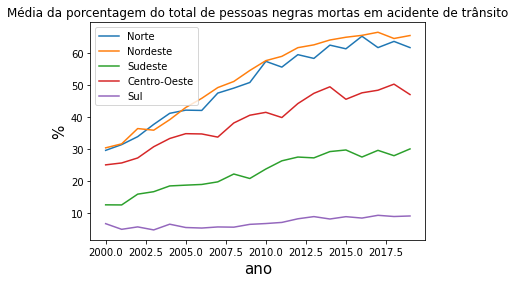

In [56]:
plt.plot(df1)
plt.title("Média da porcentagem do total de pessoas negras mortas em acidente de trânsito")
plt.xlabel("ano", size=15)
plt.ylabel("%", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

#### Observação
Podemos notar que houve aumento no porcentagem de mortes de pessoas negras no trânsito em todas as regiões. Todas as regiões, exceto a Sul, praticamente dobraram suas porcentagens de 2000 para 2019. A região Sul foi a que teve o menor aumento, variando de 6% em 2000 para 9% ao fim de 2019.

### Analisando a média da porcentagem de mortes de ciclistas por região

In [57]:
medias_regiao = [get_media_prop_by_regiao(regiao, "Ciclistas", ano) 
                 for ano in periodo
                 for regiao in regioes]

df2 = pd.DataFrame(np.array(medias_regiao).reshape(20, 5),
                   index=periodo, columns=regioes)
df2.index.name, df1.columns.name = "ano", "regiões"
df2

,Norte,Nordeste,Sudeste,Centro-Oeste,Sul
ano,,,,,
2000,3.630774,2.804874,2.244918,3.626128,0.863673
2001,5.847193,3.562264,2.111452,5.127654,1.323988
2002,7.906716,4.504914,3.481249,3.855607,1.255905
2003,5.321393,4.571978,3.921696,4.508961,1.791048
2004,7.123483,4.102414,3.909398,6.580609,1.815011
2005,8.573058,4.938880,3.370738,9.175349,1.424978
2006,8.560265,6.263349,5.300053,7.112100,2.011480
2007,10.967217,6.512059,4.759376,10.612602,1.185624
2008,9.616074,6.494443,4.172858,8.062108,1.846034


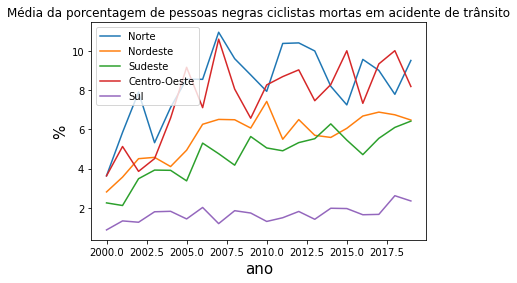

In [58]:
plt.plot(df2)
plt.title("Média da porcentagem de pessoas negras ciclistas mortas em acidente de trânsito")
plt.xlabel("ano", size=15)
plt.ylabel("%", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

In [68]:
series_dif = df2.loc[2019] - df2.loc[2000]
pd.DataFrame(series_dif.values, 
             index=regioes, 
             columns=["diferença"]).sort_values(by="diferença", 
                                                ascending=False)

,diferença
Norte,5.894228
Centro-Oeste,4.567933
Sudeste,4.179615
Nordeste,3.674859
Sul,1.479813


#### Observação
Quanto a mortes de ciclistas negros, podemos notar que houve um crescimento da porcentagem entre 2000 e 2019 em todas as regiões. As regiões com os maiores aumentos são Norte, Sudeste e Centro-Oeste, enquanto Sul é o que possui menor crescimento.